In [20]:
import pickle
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from utils import *

In [2]:
df = pd.read_csv("../data/clean_data.csv")
df.head()

CustGender  CustAccountBalance  TransactionAmount (INR)  Age
0           0            17874.44                   459.00   20
1           0           866503.21                  2060.00   43
2           0              973.46                   566.00   24
3           1            95075.54                   148.00   34
4           1             4279.22                   289.11   32

### Split

In [3]:
cols = ["CustAccountBalance", "TransactionAmount (INR)", "Age"]
X = df[cols]

### Build Model

In [5]:
n_clusters = range(2, 10)
inertia_errors = []
silhouette_errors = []

for n in n_clusters:
    # build a model
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=n, random_state=42)
    )
    # fit the model
    model.fit(X)

    # calculate the inertia
    i = model.named_steps["kmeans"].inertia_
    inertia_errors.append(i)
    # calculate silhouette score
    ss = silhouette_score(X, model.named_steps["kmeans"].labels_)
    silhouette_errors.append(ss)


#### Inertia

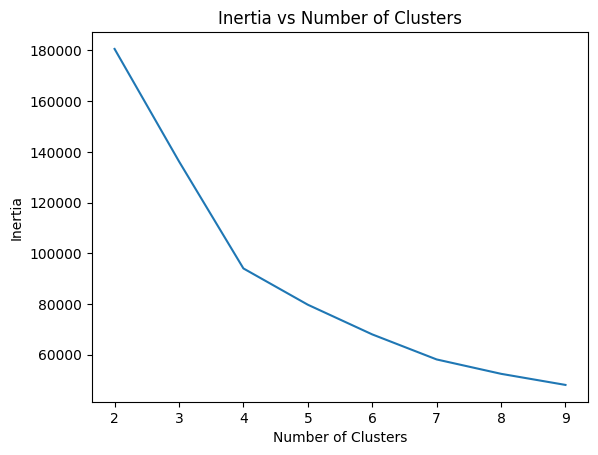

In [29]:
sns_lineplot(
    x=n_clusters, 
    y=inertia_errors,
    title="Inertia vs Number of Clusters",
    xlabel="Number of Clusters",
    ylabel="Inertia"    
);

Silhouette Score

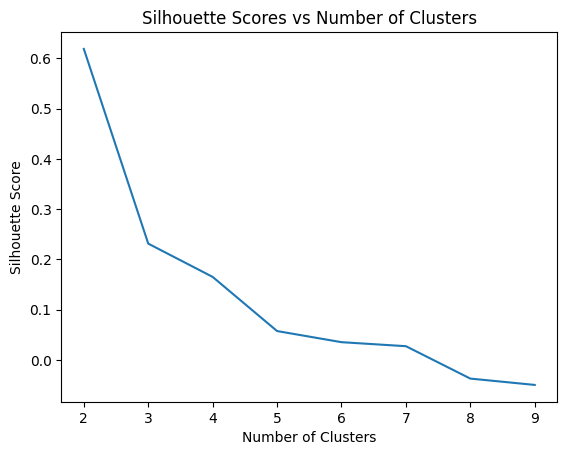

In [31]:
sns_lineplot(
    x=n_clusters,
    y=silhouette_errors,
    title="Silhouette Scores vs Number of Clusters",
    xlabel="Number of Clusters",
    ylabel="Silhouette Score"
);

From the above observations we can see that the best inertia and silhouette score occurs around 2 and 3, that the line starts to flatten. But their is a huge silhouette score difference between 2 and 3. so we can decide that the number of cluster is 2.

In [8]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=2, random_state=42)
)

final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

##### Labels

In [9]:
labels = final_model.named_steps["kmeans"].labels_.astype(str)
labels

array(['0', '1', '0', ..., '0', '0', '0'], dtype='<U11')

##### Inertia

In [10]:
final_model.named_steps["kmeans"].inertia_

180569.46477968094

##### Silhouette Score

In [11]:
silhouette_score(X, final_model.named_steps["kmeans"].labels_)

0.6185181130631521

### PCA

In [14]:
# Instantiate
pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=2, random_state=42)
)
# Transform 'X'
X_t = pca.fit_transform(X)
# Put 'X_t' into dataframe
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])
X_pca.head()

PC1       PC2
0 -1.314461  0.266396
1  3.556816 -2.133663
2 -1.054766  0.219960
3 -0.128140 -0.529363
4 -0.536968 -0.165016

In [15]:
fig = px.scatter(
    x = "PC1",
    y = "PC2",
    data_frame=X_pca,
    color=labels
)

fig.show()

#### Save the Model

In [51]:
path = '../models/' + datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + '.pkl'
with open(path, 'wb') as f:
    pickle.dump(final_model, f)